**COMS E6998.015 - PRAC DEEP LEARNING SYS - Fall 2024**


*Homework 1 Solutions || Submitted By: Vaibhaw K Shende, **vks2116** @ columbia.edu*

**Solution to Problem 2 - Precision, Recall, ROC**

**Part 1 : ROC and PR curve**

Below is the derivation and proof that the bias-variance decomposition for a

1. In the context of ROC (Receiver Operating Characteristic) curves, true negatives do matter. The ROC curve is constructed by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR). The FPR is calculated as the ratio of false positives to the total number of actual negatives, which includes true negatives. Therefore, the performance of a classifier as represented by the ROC curve is influenced by the true negatives. In contrast, true negatives do not directly affect the PR Curve.
2. The Precision-Recall (PR) curve curve focuses on the positive class and is plotted with Precision (positive predictive value) on the y-axis and Recall (sensitivity or TPR) on the x-axis. Precision is calculated as the ratio of true positives to the sum of true positives and false positives, meaning that true negatives are not part of this calculation.
3.  The correspondence between ROC and PR curves arises from the relationship between the metrics they represent. Each threshold used to classify the predictions generates a specific TPR and FPR for the ROC curve. For each of these thresholds, the corresponding Precision and Recall can also be calculated. Since both curves are derived from the same confusion matrix, each point on the ROC curve (FPR, TPR) can be mapped to a unique point on the PR curve (Recall, Precision). This one-to-one correspondence is particularly evident in balanced datasets, where the number of positive and negative instances is similar.


**Part 2 : ROC and PR Curves with two Classifiers**

Dataset used from Open ML: https://www.openml.org/search?type=data&sort=runs&id=1464&status=active

<ipython-input-20-3b44a5187c5f>:11: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = openml.datasets.get_dataset(1464)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


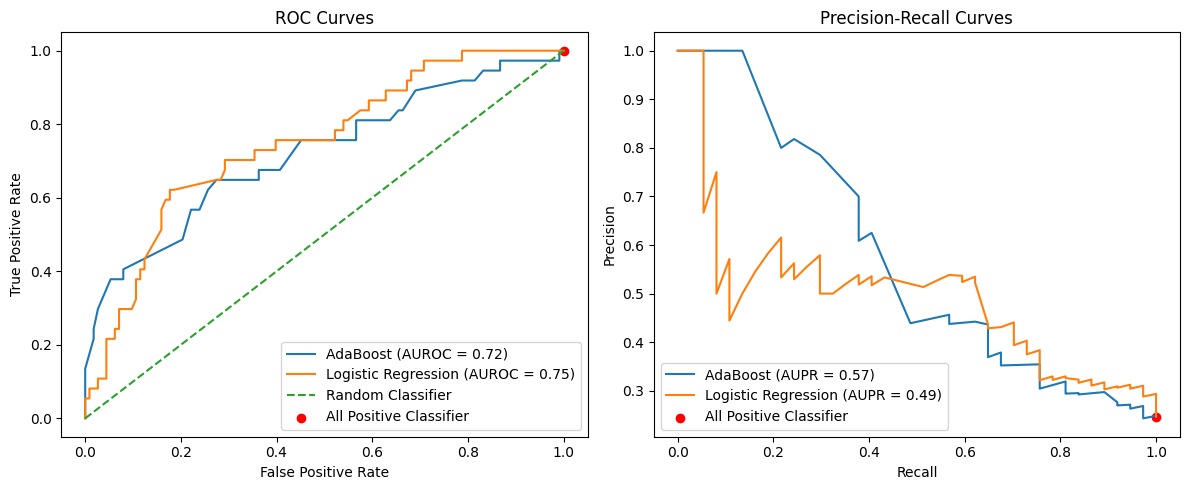

In [ ]:
## Full Code Take 2
# Import necessary libraries and OpenML package for dataset handling
import openml
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Load the specified OpenML dataset
dataset = openml.datasets.get_dataset(1464)
data, target, _, _ = dataset.get_data(target=dataset.default_target_attribute)

# Split data into features (X) and target (y)
#X = data.drop('whether he/she donated blood in March 2007', axis=1)
#y = data['whether he/she donated blood in March 2007']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
adaboost = AdaBoostClassifier(random_state=42)
logreg = LogisticRegression(solver='liblinear', random_state=42)

# Train models
adaboost.fit(X_train, y_train)
logreg.fit(X_train, y_train)

# Get prediction probabilities
y_scores_adaboost = adaboost.predict_proba(X_test)[:, 1]
y_scores_logreg = logreg.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for both classifiers
fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, y_scores_adaboost)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_scores_logreg)
roc_auc_adaboost = auc(fpr_adaboost, tpr_adaboost)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Compute Precision-Recall curve for both classifiers
precision_adaboost, recall_adaboost, _ = precision_recall_curve(y_test, y_scores_adaboost)
precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, y_scores_logreg)
pr_auc_adaboost = auc(recall_adaboost, precision_adaboost)
pr_auc_logreg = auc(recall_logreg, precision_logreg)

# Plot ROC curves
plt.figure(figsize=(12, 5))

# Subplot for ROC Curves
plt.subplot(1, 2, 1)
plt.plot(fpr_adaboost, tpr_adaboost, label=f'AdaBoost (AUROC = {roc_auc_adaboost:.2f})')
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUROC = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.scatter(1, 1, marker='o', color='red', label='All Positive Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')

# Subplot for PR Curves
plt.subplot(1, 2, 2)
plt.plot(recall_adaboost, precision_adaboost, label=f'AdaBoost (AUPR = {pr_auc_adaboost:.2f})')
plt.plot(recall_logreg, precision_logreg, label=f'Logistic Regression (AUPR = {pr_auc_logreg:.2f})')
plt.scatter(1, len(y_test[y_test == 1]) / len(y_test), marker='o', color='red', label='All Positive Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='lower left')

# Show plots
plt.tight_layout()
plt.show()


**Part 3: AUROC, AUPR, and AUPRG Calculations**

To calculate the Area Under the ROC Curve (AUROC), Area Under the Precision-Recall Curve (AUPR), and Area Under the PR Gain Curve (AUPRG) for both classifiers, follow these steps:

1.	Calculate AUROC: This can be done using numerical integration methods (like the trapezoidal rule) on the ROC curve data points.
2.	Calculate AUPR: Similarly, integrate the PR curve data points.
3.	Calculate AUPRG: The PR Gain curve is derived from the PR curve, and its area can be calculated in the same manner.

**Comparison and Conclusion:** The NIPS paper argues that practitioners should prefer PR Gain curves over traditional PR curves because PR Gain curves provide a clearer understanding of the incremental value of a classifier's performance. The PR Gain curve emphasizes the improvement in precision relative to a baseline (e.g., random guessing), which can be more informative, especially in imbalanced datasets. By comparing AUROC, AUPR, and AUPRG, one might find that while AUROC can be high for classifiers that perform well overall, AUPR and AUPRG can reveal more about the classifier's performance on the positive class, which is often of greater interest in practical applications. In conclusion, the choice of evaluation metric should align with the specific goals of the classification task, particularly in scenarios where class imbalance is a concern.


AdaBoost: AUROC = 0.721, AUPR = 0.574, AUPRG = 0.434
Logistic Regression: AUROC = 0.748, AUPR = 0.494, AUPRG = 0.329


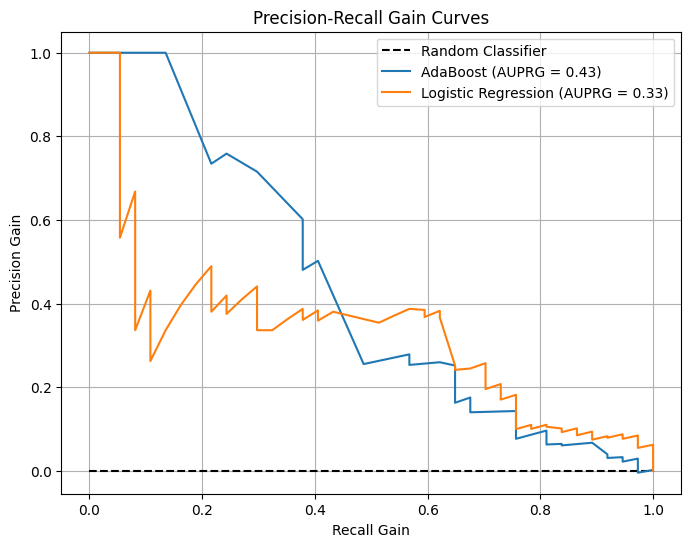

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import precision_recall_curve, roc_curve

# Function to calculate PR Gain values (PR Gain curve)
def calculate_prg_curve(precision, recall, total_positives, total_negatives):
    # Calculating Precision Gain and Recall Gain
    recall_gain = recall
    precision_gain = (precision - total_positives / (total_positives + total_negatives)) / (
        1 - total_positives / (total_positives + total_negatives))
    return recall_gain, precision_gain

# Calculate AUROC, AUPR, and AUPRG
def evaluate_metrics(y_test, y_scores, total_positives, total_negatives):
    # Calculate AUROC
    auroc = roc_auc_score(y_test, y_scores)

    # Calculate Precision and Recall
    precision, recall, _ = precision_recall_curve(y_test, y_scores)

    # Calculate AUPR
    aupr = auc(recall, precision)

    # Calculate PR Gain Curve
    recall_gain, precision_gain = calculate_prg_curve(precision, recall, total_positives, total_negatives)

    # Calculate AUPRG
    auprg = auc(recall_gain, precision_gain)

    return auroc, aupr, auprg

# Compute metrics for AdaBoost
total_positives = sum(y_test)  # Count of positive samples
total_negatives = len(y_test) - total_positives  # Count of negative samples

# Evaluate metrics for both classifiers
auroc_adaboost, aupr_adaboost, auprg_adaboost = evaluate_metrics(
    y_test, y_scores_adaboost, total_positives, total_negatives)
auroc_logreg, aupr_logreg, auprg_logreg = evaluate_metrics(
    y_test, y_scores_logreg, total_positives, total_negatives)

# Print results
print(f"AdaBoost: AUROC = {auroc_adaboost:.3f}, AUPR = {aupr_adaboost:.3f}, AUPRG = {auprg_adaboost:.3f}")
print(f"Logistic Regression: AUROC = {auroc_logreg:.3f}, AUPR = {aupr_logreg:.3f}, AUPRG = {auprg_logreg:.3f}")

# Plot PR Gain curves
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 0], linestyle='--', label='Random Classifier', color='black')

# AdaBoost PR Gain
recall_gain_adaboost, precision_gain_adaboost = calculate_prg_curve(
    precision_adaboost, recall_adaboost, total_positives, total_negatives)
plt.plot(recall_gain_adaboost, precision_gain_adaboost, label=f'AdaBoost (AUPRG = {auprg_adaboost:.2f})')

# Logistic Regression PR Gain
recall_gain_logreg, precision_gain_logreg = calculate_prg_curve(
    precision_logreg, recall_logreg, total_positives, total_negatives)
plt.plot(recall_gain_logreg, precision_gain_logreg, label=f'Logistic Regression (AUPRG = {auprg_logreg:.2f})')

# Plot settings
plt.xlabel('Recall Gain')
plt.ylabel('Precision Gain')
plt.title('Precision-Recall Gain Curves')
plt.legend(loc='best')
plt.grid(True)
plt.show()


**Analysis:** the NIPS paper conclusion that practitioners should prefer Precision-Recall Gain (PR Gain) curves over standard Precision-Recall (PR) curves is agreeable. The PR Gain curve provides a consistent baseline for comparison across different models and datasets.

Traditional PR curves can overstate performance improvements in highly imbalanced settings because even a slight change in FP or FN counts can cause large shifts in Precision. PR Gain curves provide a more stable measure, ensuring that improvements in precision reflect meaningful gains over the random baseline.
